# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

    Disini kita akan melakukan scraping data nilai tukar dari Rupiah (Rp) ke Dolar (USD). website yang akan di scraping adalah `https://www.exchange-rates.org/history/IDR/USD/T` dalam website tersebut periode datanya antara 12 Juli 2021 s.d. 7 Januari 2021

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [42]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [43]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/ht'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [144]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [45]:
table = soup.find('div',attrs={'class':'table-responsive'})
print(table.prettify()[1:500])

div class="table-responsive">
 <table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
  <tbody>
   <tr>
    <td>
     1/7/2022
    </td>
    <td>
     Friday
    </td>
    <td>
     <a href="/Rate/USD/IDR/1-7-2022">
      14,303.69386
     </a>
     IDR
    </td>
    <td class="text-narrow-screen-hidden">
     <a href="/Rate/USD/IDR/1-7-2022">
      USD IDR rate for 1/7/2022
     </a>
    </td>
   </tr>
   <tr>
    <td>
     1/6/2022
    </td>
    <td>
 


Finding row length.

In [97]:
row = table.find_all('tr')
row_length = len(row)
row_length

130

Do the scrapping process here (please change this markdown with your explanation)

In [101]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #scrapping process    
    #get period 
    period = table.find_all('td')[i*4].text

    #get period 
    rate = table.find_all('a')[i*2].text

    temp.append((period,rate)) 
temp 

[('1/7/2022', '14,303.69386'),
 ('1/6/2022', '14,387.13904'),
 ('1/5/2022', '14,376.59427'),
 ('1/4/2022', '14,306.22137'),
 ('1/3/2022', '14,271.10676'),
 ('12/31/2021', '14,184.77099'),
 ('12/30/2021', '14,249.76380'),
 ('12/29/2021', '14,198.28676'),
 ('12/28/2021', '14,221.34174'),
 ('12/27/2021', '14,227.31928'),
 ('12/24/2021', '14,264.51755'),
 ('12/23/2021', '14,256.89960'),
 ('12/22/2021', '14,298.20378'),
 ('12/21/2021', '14,304.01234'),
 ('12/20/2021', '14,382.49273'),
 ('12/17/2021', '14,389.66562'),
 ('12/16/2021', '14,330.91366'),
 ('12/15/2021', '14,251.62584'),
 ('12/14/2021', '14,341.93227'),
 ('12/13/2021', '14,357.75629'),
 ('12/10/2021', '14,370.27875'),
 ('12/9/2021', '14,344.97904'),
 ('12/8/2021', '14,370.91961'),
 ('12/7/2021', '14,347.32452'),
 ('12/6/2021', '14,432.56943'),
 ('12/3/2021', '14,389.50020'),
 ('12/2/2021', '14,392.39767'),
 ('12/1/2021', '14,347.93748'),
 ('11/30/2021', '14,353.30743'),
 ('11/29/2021', '14,295.39385'),
 ('11/26/2021', '14,300.353

i dari 0 karena tidak memiliki judul tabel, kalo diubah jadi 1 maka jumlah datanya hanya 129

i pada period iterasinya perlu dikali 4 dan i pada rate perlu dikali 2 untuk menghasilkan df yang sama jumlah barisnya dan mendapatkan informasi mengenai period dan rate 

Datanya masih kebalik, jadi perlu dibalik terlebih dahulu

In [102]:
temp = temp[::-1]
temp[:10]

[('7/12/2021', '14,491.59294'),
 ('7/13/2021', '14,476.52203'),
 ('7/14/2021', '14,404.17703'),
 ('7/15/2021', '14,469.95831'),
 ('7/16/2021', '14,495.41215'),
 ('7/19/2021', '14,490.12260'),
 ('7/20/2021', '14,514.10964'),
 ('7/21/2021', '14,495.34596'),
 ('7/22/2021', '14,508.09177'),
 ('7/23/2021', '14,492.63051')]

## Creating data frame & Data wrangling

Put the array into dataframe

In [123]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('period','rate'))
df.head(10)

,period,rate
0,7/12/2021,"14,491.59294"
1,7/13/2021,"14,476.52203"
2,7/14/2021,"14,404.17703"
3,7/15/2021,"14,469.95831"
4,7/16/2021,"14,495.41215"
5,7/19/2021,"14,490.12260"
6,7/20/2021,"14,514.10964"
7,7/21/2021,"14,495.34596"
8,7/22/2021,"14,508.09177"
9,7/23/2021,"14,492.63051"


In [124]:
df.dtypes

period    object
rate      object
dtype: object

Period perlu diubah menjadi datetime64
sedangkan rate perlu diubah jadi float64

In [125]:
df['period'] = df['period'].astype('datetime64')
df['rate'] = df['rate'].str.replace(',','')
df['rate'] = df['rate'].astype('float64')



df.dtypes

period    datetime64[ns]
rate             float64
dtype: object

Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [126]:
df.isna()


,period,rate
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
125,False,False
126,False,False
127,False,False
128,False,False


In [127]:
df.isna().count()

period    130
rate      130
dtype: int64

Seluruh data memiliki nilai dan tidak ada data yang kosong, sehingga tidak perlu dilakukan apapun.

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

Lakukan groupby menggunakan period dengan agg mean pada rate, mean digunakan karena data pada 1 periode berjumlah 1 sehingga dapat menggunakan mean sebagai agg. groupby digunakan agar data dapat diploting. apabila langsung data tidak dapat dilakukan ploting

In [139]:
df_p = df.groupby('period').agg({'rate':'mean'})
df_p

,rate
period,
2021-07-12,14491.59294
2021-07-13,14476.52203
2021-07-14,14404.17703
2021-07-15,14469.95831
2021-07-16,14495.41215
...,...
2022-01-03,14271.10676
2022-01-04,14306.22137
2022-01-05,14376.59427


In [143]:
df_q = df.set_index('period')
df_q

,rate
period,
2021-07-12,14491.59294
2021-07-13,14476.52203
2021-07-14,14404.17703
2021-07-15,14469.95831
2021-07-16,14495.41215
...,...
2022-01-03,14271.10676
2022-01-04,14306.22137
2022-01-05,14376.59427


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:xlabel='period'>

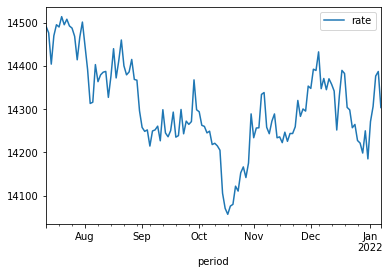

In [140]:
df_p.plot()

<AxesSubplot:>

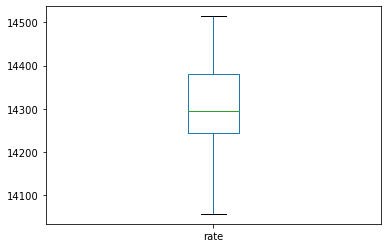

In [141]:
df_p.plot.box()

- Nilai tukar tertinggi USD ke Rp pada 2021 - Jan 2022 terjadi pada bulan Juli 2021, yaitu mencapai 14.500
- Nilai tukar terendah USD ke Rp pada 2021 - Jan 2022 terjadi pada bulan Oktober, yaitu mencapai 14.100
- Tidak ada data outlier pada data nilai data nilai tukar
- Rata-rata nilai tukar berada di kisara Rp14.300/USD


### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.